In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from pathlib import Path

In [3]:
path_img = Path('./dataset_20_images/train')

In [4]:
path_img.ls()

['shila_amzah',
 'fasha_sandha',
 'hanna_delisha',
 'siti_nurhaliza',
 'nur_fazura',
 'lisa_surihani',
 'sharifah_sakinah',
 'fatiya_latiff',
 'samantha_lee',
 'zara_zya',
 'syamtilla_melvin',
 'siti_sarah',
 'yumi_wong',
 'diana_danielle',
 'erin_malek',
 'erra_fazira',
 'zizan_razak',
 'zul_ariffin',
 'neelofa',
 'yana_samsudin',
 'anzalna_nasir',
 'nabila_razali',
 'dato_seri_vida',
 'aeril_zafrel',
 'ayda_jebat',
 'emma_maembong',
 'zulin_aziz',
 'mia_ahmad',
 'nelydia_senrose',
 'alif_satar',
 'hairul_azreen',
 'ajak_shiro',
 'nabila_huda',
 'khai_bahar',
 'fattah_amin',
 'aiman_hakim',
 'siti_nordiana',
 'ummi_nazeera',
 'scha_alyahya',
 'siti_saleha',
 'nora_danish',
 'models',
 'tiz_zaqyah',
 'vivy_yusof',
 'awal_ashaari',
 'janna_nick']

In [5]:
fnames = []
for i in path_img.ls():
    fnames += get_image_files(path_img/i)
fnames[0:5]

[PosixPath('dataset_20_images/train/shila_amzah/84_35428951_196000047781224_1314821447880802304_n.jpg'),
 PosixPath('dataset_20_images/train/shila_amzah/31_37933157_868954576608646_8765394545891344384_n.jpg'),
 PosixPath('dataset_20_images/train/shila_amzah/2_38097298_1410140885754994_7314907862952574976_n.jpg'),
 PosixPath('dataset_20_images/train/shila_amzah/29_37405309_516963622071606_5906714294208167936_n.jpg'),
 PosixPath('dataset_20_images/train/shila_amzah/13_38526093_222088835146844_7292843069764796416_n.jpg')]

In [6]:
np.random.seed(2)
pat = r'/train/(.*)/'

In [104]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

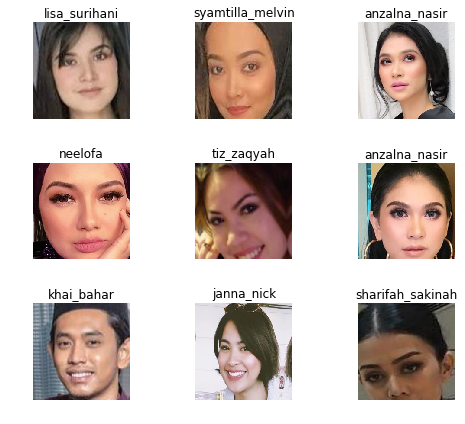

In [106]:
data.show_batch(rows=3, figsize=(7,6))

In [107]:
print(data.classes)
len(data.classes),data.c

['shila_amzah', 'fasha_sandha', 'hanna_delisha', 'siti_nurhaliza', 'nur_fazura', 'lisa_surihani', 'sharifah_sakinah', 'fatiya_latiff', 'samantha_lee', 'zara_zya', 'syamtilla_melvin', 'siti_sarah', 'yumi_wong', 'diana_danielle', 'erin_malek', 'erra_fazira', 'zizan_razak', 'zul_ariffin', 'neelofa', 'yana_samsudin', 'anzalna_nasir', 'nabila_razali', 'dato_seri_vida', 'aeril_zafrel', 'ayda_jebat', 'emma_maembong', 'zulin_aziz', 'mia_ahmad', 'nelydia_senrose', 'alif_satar', 'hairul_azreen', 'ajak_shiro', 'nabila_huda', 'khai_bahar', 'fattah_amin', 'aiman_hakim', 'siti_nordiana', 'ummi_nazeera', 'scha_alyahya', 'siti_saleha', 'nora_danish', 'tiz_zaqyah', 'vivy_yusof', 'awal_ashaari', 'janna_nick']


(45, 45)

In [109]:
learn = ConvLearner(data, models.resnet34, metrics=error_rate)

In [110]:
learn.fit_one_cycle(4)

Total time: 00:35
epoch  train loss  valid loss  error_rate
1      4.281513    3.607767    0.902857    (00:09)
2      3.611110    2.783159    0.720000    (00:08)
3      3.031238    2.466013    0.662857    (00:08)
4      2.645745    2.405810    0.651429    (00:08)



In [111]:
learn.save('stage-1')

In [112]:
interp = ClassificationInterpretation.from_learner(learn)

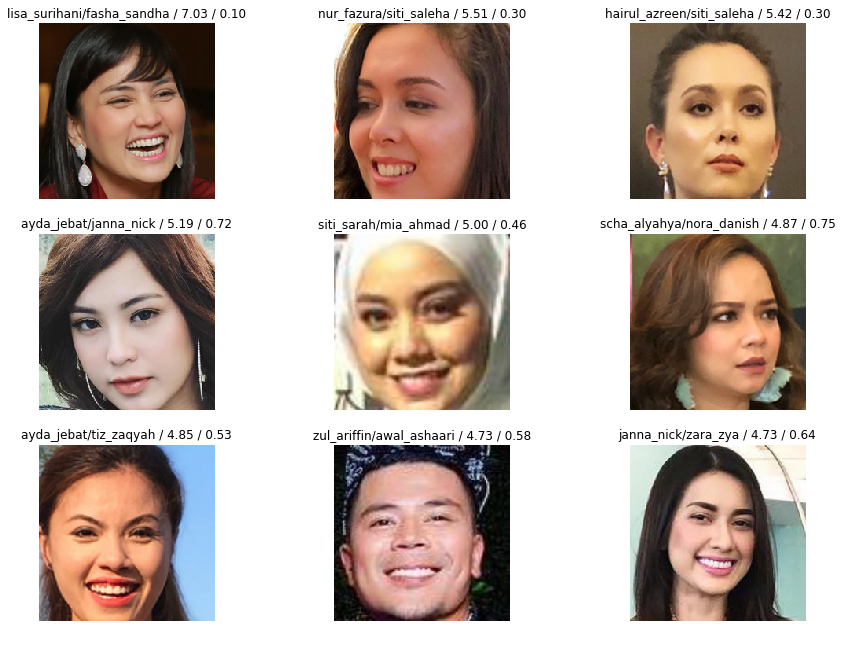

In [113]:
interp.plot_top_losses(9, figsize=(15,11))

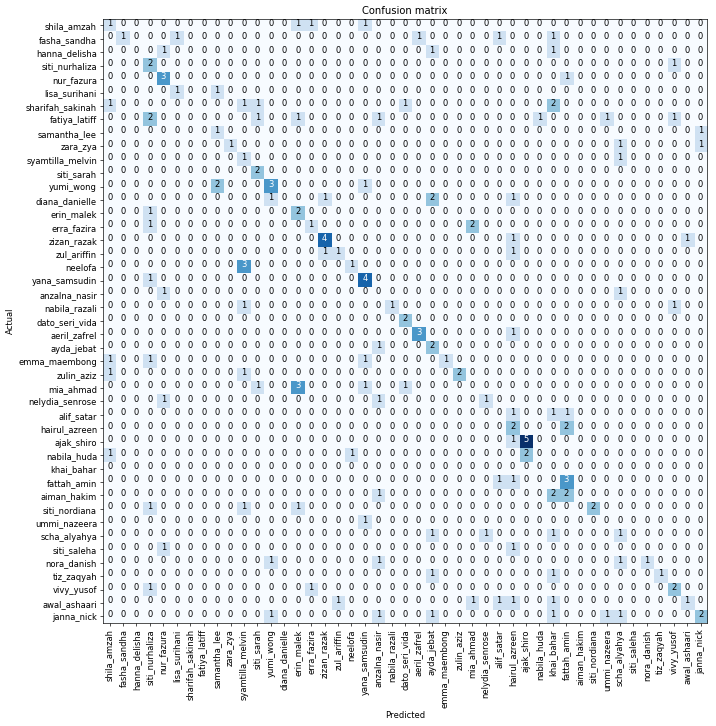

In [114]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


In [115]:
interp.most_confused(min_val=2)

[('neelofa', 'syamtilla_melvin', 3), ('mia_ahmad', 'erin_malek', 3)]

In [7]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=299, bs=48, valid_pct=0.1)
data.normalize(imagenet_stats)

In [16]:
learn = ConvLearner(data, models.resnet50, metrics=error_rate)

In [9]:
#learn.fit_one_cycle(10)

Total time: 05:03
epoch  train loss  valid loss  error_rate
1      4.071328    3.238573    0.797753    (01:01)
2      3.153028    2.338132    0.606742    (00:26)
3      2.462443    1.853548    0.460674    (00:26)
4      1.943210    1.556666    0.404494    (00:26)
5      1.512638    1.444366    0.370786    (00:26)
6      1.177030    1.395774    0.370786    (00:26)
7      0.933008    1.339399    0.382022    (00:26)
8      0.735161    1.300591    0.359551    (00:26)
9      0.595733    1.291630    0.359551    (00:26)
10     0.491833    1.289015    0.359551    (00:27)



In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-5,1e-3))

In [10]:
learn.save('stage-1-50')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

